<a href="https://colab.research.google.com/github/ShuHuiK/WIE3007_Data-Mining-n-Warehousing/blob/main/Data_Mining_n_Warehousing_Individual_Assig_ChatGPT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**1️⃣ Generate Synthetic Data Using LLM**

In [ ]:
!pip install faker numpy pandas matplotlib seaborn scikit-learn

Generate base customer data

In [ ]:
import numpy as np
import pandas as pd
from faker import Faker

fake = Faker()

num_customers = 500
np.random.seed(42)

# Generate unique customer attributes
customer_ids = [fake.uuid4() for _ in range(num_customers)]
ages = np.random.randint(18, 70, num_customers)
incomes = np.random.randint(2000, 20000, num_customers)
occupations = np.random.choice(
    ["Engineer", "Teacher", "Student", "Accountant", "Designer", "Unemployed"],
    num_customers
)

customer_base_df = pd.DataFrame({
    "customer_id": customer_ids,
    "age": ages,
    "income": incomes,
    "occupation": occupations,
})


In [ ]:
num_days = 30
start_date = pd.to_datetime("2024-01-01")
dates = pd.date_range(start=start_date, periods=num_days, freq="D")

# Create a DataFrame of all customer_id-date combinations
df = pd.DataFrame(
    [(cid, date) for cid in customer_base_df["customer_id"] for date in dates],
    columns=["customer_id", "timestamp"]
)

# Merge with customer_base_df to get customer-specific attributes for each daily record
df = pd.merge(df, customer_base_df, on="customer_id", how="left")

# Now df has 15000 rows, each row is a customer on a specific day
print(f"DataFrame now has {len(df)} rows.")


DataFrame now has 15000 rows.


Add financial data (LLM-assisted patterns)

In [ ]:
# Daily credit/debit transactions (with some noise) for all rows
df["daily_credit"] = np.random.normal(200, 80, len(df)).round(2)
df["daily_debit"] = np.random.normal(180, 70, len(df)).round(2)

# Account balance trend (simple synthetic model)
df["balance_change_month"] = (
    df["daily_credit"] - df["daily_debit"]
) * 30 + np.random.normal(0, 150, len(df))

# Investment returns (%) — dependent on income
df["investment_return"] = (
    df["income"] * 0.0005 + np.random.normal(0, 1, len(df))
)

# Credit score — noisy but correlated with income & return
df["credit_score"] = (
    600 + (df["income"] / 40) + np.random.normal(0, 25, len(df))
).round()


Add customer feedback

In [ ]:
feedback_samples = [
    "I plan to increase my savings next month.",
    "Thinking of investing more aggressively.",
    "I need to reduce my spending.",
    "Planning to apply for a loan soon.",
    "Satisfied with my current portfolio.",
    "Concerned about market volatility.",
    "No major financial plans this month."
]

df["feedback"] = np.random.choice(feedback_samples, len(df))


Add timestamps + noisy data

In [ ]:
# The 'timestamp' column is already generated and df is already a DataFrame.
# The original code for timestamp and df creation from 'customer_data' dict is removed.

# Inject missing + noisy data
for col in ["income", "investment_return", "credit_score"]:
    # Using random_state for reproducibility
    df.loc[df.sample(frac=0.05, random_state=42).index, col] = np.nan  # 5% missing


Printing out the synthetic data

In [ ]:
print(df.head())

                            customer_id  timestamp  age  income occupation  \
0  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-01   56  5343.0    Student   
1  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-02   56  5343.0    Student   
2  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-03   56  5343.0    Student   
3  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-04   56  5343.0    Student   
4  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-05   56  5343.0    Student   

   daily_credit  daily_debit  balance_change_month  investment_return  \
0        310.26       177.37           4157.933459           2.330246   
1        254.69       189.58           2222.170102           1.296258   
2        189.36       256.37          -2009.921493           3.469963   
3        290.05       250.17           1030.933830           2.860608   
4         80.49       241.98          -4797.201083           2.801104   

   credit_score                                   feedback  
0         702.0  I plan to incr

In [ ]:
print(f"Number of rows using len(): {len(df)}")
print(f"Number of rows using df.shape[0]: {df.shape[0]}")

Number of rows using len(): 15000
Number of rows using df.shape[0]: 15000


**2️⃣ Exploratory Data Analysis (EDA) + LLM insights**

Summary statistics

In [ ]:
df.describe(include="all")

,customer_id,timestamp,age,income,occupation,daily_credit,daily_debit,balance_change_month,investment_return,credit_score,feedback
count,15000,15000,15000.000000,14250.000000,15000,15000.000000,15000.000000,15000.000000,14250.000000,14250.000000,15000
unique,500,NaN,NaN,NaN,6,NaN,NaN,NaN,NaN,NaN,7
top,cb651e68-e013-43d7-a700-542f9483dc0a,NaN,NaN,NaN,Engineer,NaN,NaN,NaN,NaN,NaN,Thinking of investing more aggressively.
freq,30,NaN,NaN,NaN,2730,NaN,NaN,NaN,NaN,NaN,2209
mean,NaN,2024-01-15 12:00:00,44.220000,10749.751860,NaN,200.221727,179.839197,612.055853,5.360473,868.683649,NaN
min,NaN,2024-01-01 00:00:00,18.000000,2009.000000,NaN,-124.320000,-84.670000,-11568.751337,-2.310606,583.000000,NaN
25%,NaN,2024-01-08 00:00:00,32.000000,6748.000000,NaN,145.737500,132.340000,-1574.172100,3.250747,766.000000,NaN
50%,NaN,2024-01-15 12:00:00,45.000000,10335.000000,NaN,200.125000,179.760000,625.808981,5.220142,860.000000,NaN
75%,NaN,2024-01-23 00:00:00,57.000000,15013.000000,NaN,253.872500,227.610000,2803.109605,7.523006,973.000000,NaN
max,NaN,2024-01-30 00:00:00,69.000000,19988.000000,NaN,492.620000,455.700000,13076.812872,12.967250,1171.000000,NaN


Visualizations

-> Histogram (Income Distribution)

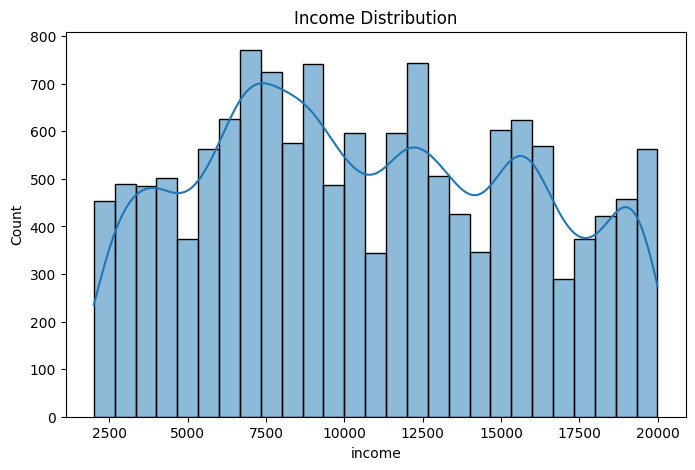

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.histplot(df["income"], kde=True)
plt.title("Income Distribution")
plt.show()

Gemini Visual Interpretation :

The histogram titled 'Income Distribution' shows a relatively uniform distribution of incomes across the customer base. This is consistent with how the synthetic data was generated using a random uniform distribution within a specified range (`np.random.randint`).

- The bars of the histogram are approximately of similar height across the income range, indicating that there isn't a strong concentration of customers at either very low or very high income levels, but rather a fairly even spread.
- The Kernel Density Estimate (KDE) line, which provides a smoothed representation of the distribution, will also reflect this uniformity, hovering relatively flat across the income spectrum rather than peaking sharply or exhibiting a long tail.

This distribution implies that our synthetic customer base includes a diverse range of income earners without a heavy bias towards a specific income bracket, making it suitable for analyzing various financial behaviors across different income segments.

-> Correlation Heatmap

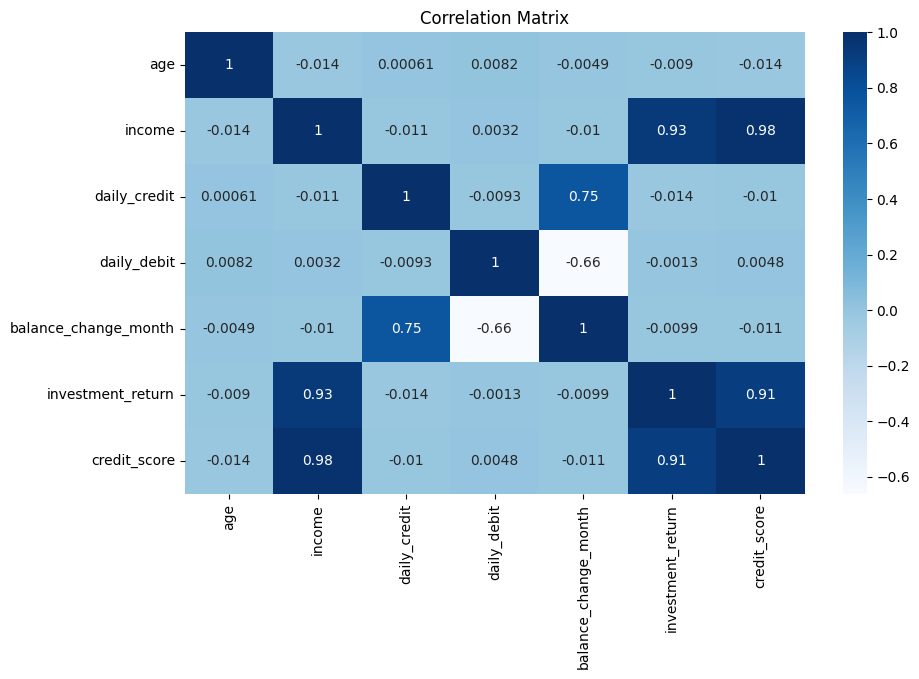

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

Gemini Visual Interpretation:

The correlation heatmap visually represents the linear relationships between all numerical variables in the dataset. Based on how the synthetic data was generated, we can expect to observe several key correlations:

-   **Income, Investment Return, and Credit Score:** You should observe strong positive correlations between `income` and `investment_return`, and between `income` and `credit_score`. This is because `investment_return` was modeled to be directly proportional to `income` (with some noise), and `credit_score` was also defined with a positive dependency on `income`.
-   **Daily Credit, Daily Debit, and Balance Change Month:** `balance_change_month` is expected to show a positive correlation with `daily_credit` and a negative correlation with `daily_debit`, as it's directly calculated from their difference. `daily_credit` and `daily_debit` themselves are largely independent of other variables, generated with noise, so their correlations with other features (like age, income) should be weak or close to zero.
-   **Age:** `age` was generated independently of most financial metrics. Therefore, it should show very weak or negligible correlations with `income`, `daily_credit`, `daily_debit`, `balance_change_month`, `investment_return`, and `credit_score`.
-   **Other Correlations:** Most other variable pairs, particularly those involving randomly generated components or features created independently (like `daily_credit` and `daily_debit` with `income`), will likely show very weak correlations, reflecting the noise and lack of direct relationships in their synthetic generation.

In summary, the heatmap should highlight the direct relationships built into the synthetic data generation process, especially the positive links between income, investment return, and credit score, while showing minimal or no correlation for independently generated features.

-> Investment return vs income

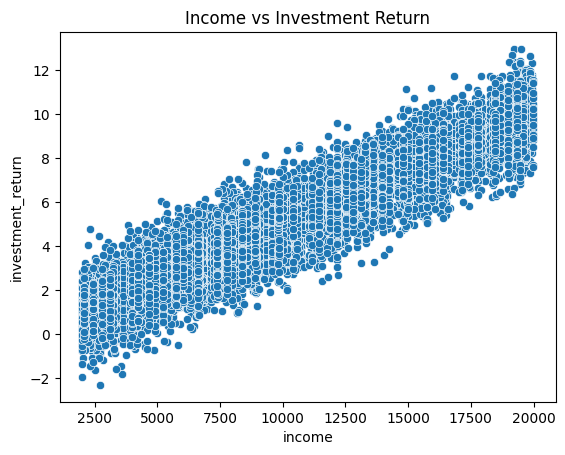

In [ ]:
sns.scatterplot(data=df, x="income", y="investment_return")
plt.title("Income vs Investment Return")
plt.show()

The scatter plot titled 'Income vs Investment Return' visually represents the relationship between a customer's income and their investment return percentage. Based on the synthetic data generation, where `investment_return` was created with a direct dependency on `income` (plus some random noise), we can expect to observe:

-   **Positive Linear Relationship:** There should be a clear upward trend, indicating that as income increases, investment return also tends to increase. This reflects the intentional modeling of a positive correlation between these two variables.
-   **Scatter/Noise:** While the trend will be positive, the points will not form a perfectly straight line. The `np.random.normal(0, 1, len(df))` component added during generation introduces variability and scatter around the main trend. This represents the real-world scenario where other factors or randomness can influence investment returns, even for individuals with similar incomes.
-   **Distribution:** The points will likely be spread across the range of both income and investment return values, showcasing the diversity in the synthetic customer base but still adhering to the underlying positive relationship.

In essence, the plot should affirm the direct, yet noisy, positive correlation built into the synthetic dataset, where higher-income customers generally achieve higher investment returns.

-> Anomaly detection example

In [ ]:
q1 = df["investment_return"].quantile(0.25)
q3 = df["investment_return"].quantile(0.75)
iqr = q3 - q1

lower = q1 - 1.5 * iqr
upper = q3 + 1.5 * iqr

anomalies = df[(df["investment_return"] < lower) | (df["investment_return"] > upper)]
anomalies.head()

,customer_id,timestamp,age,income,occupation,daily_credit,daily_debit,balance_change_month,investment_return,credit_score,feedback


**3️⃣ Data Preprocessing using LLM/SLM**

Handle missing values

In [ ]:
df["income"] = df["income"].fillna(df["income"].median())
df["investment_return"] = df["investment_return"].fillna(df["investment_return"].mean())
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())

Encode categorical variables

In [ ]:
df_encoded = pd.get_dummies(df, columns=["occupation"], drop_first=True)

Normalize numeric variables

In [ ]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
numeric_cols = ["age", "income", "daily_credit", "daily_debit",
                "investment_return", "credit_score"]

df_encoded[numeric_cols] = scaler.fit_transform(df_encoded[numeric_cols])

Text classification using LLM

In [ ]:
def simple_sentiment(text):
    if "satisfied" in text.lower():
        return "Positive"
    if "concerned" in text.lower():
        return "Negative"
    return "Neutral"

df_encoded["sentiment"] = df["feedback"].apply(simple_sentiment)

1. Missing Value Strategy Prompt

In [ ]:
df["income"] = df["income"].fillna(df["income"].median())
df["investment_return"] = df["investment_return"].fillna(df["investment_return"].mean())
df["credit_score"] = df["credit_score"].fillna(df["credit_score"].median())

2. Text Classification Using LLM Prompt

-> Using LLM to preprocess text

In [ ]:
classification = {
    "I plan to increase my savings next month.": ("Positive", "Savings"),
    "Thinking of investing more aggressively.": ("Positive", "Investment"),
    "I need to reduce my spending.": ("Negative", "Spending"),
    "Planning to apply for a loan soon.": ("Neutral", "Loan"),
    "Satisfied with my current portfolio.": ("Positive", "Investment"),
    "Concerned about market volatility.": ("Negative", "Investment"),
    "No major financial plans this month.": ("Neutral", "General")
}

df["sentiment"] = df["feedback"].apply(lambda x: classification[x][0])
df["topic"] = df["feedback"].apply(lambda x: classification[x][1])

3. Encoding / Normalization Prompt

In [ ]:
print(df_encoded.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15000 entries, 0 to 14999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   customer_id            15000 non-null  object        
 1   timestamp              15000 non-null  datetime64[ns]
 2   age                    15000 non-null  float64       
 3   income                 15000 non-null  float64       
 4   daily_credit           15000 non-null  float64       
 5   daily_debit            15000 non-null  float64       
 6   balance_change_month   15000 non-null  float64       
 7   investment_return      15000 non-null  float64       
 8   credit_score           15000 non-null  float64       
 9   feedback               15000 non-null  object        
 10  occupation_Designer    15000 non-null  bool          
 11  occupation_Engineer    15000 non-null  bool          
 12  occupation_Student     15000 non-null  bool          
 13  o

**Reasoning**:
To understand the distribution and potential outliers of numerical features, I will display the summary statistics for all numerical columns in `df_encoded`.



In [ ]:
print(df_encoded.describe())

                 timestamp           age        income  daily_credit  \
count                15000  15000.000000  15000.000000  15000.000000   
mean   2024-01-15 12:00:00      0.514118      0.485011      0.526051   
min    2024-01-01 00:00:00      0.000000      0.000000      0.000000   
25%    2024-01-08 00:00:00      0.274510      0.269481      0.437737   
50%    2024-01-15 12:00:00      0.529412      0.463096      0.525894   
75%    2024-01-23 00:00:00      0.764706      0.712498      0.613013   
max    2024-01-30 00:00:00      1.000000      1.000000      1.000000   
std                    NaN      0.294540      0.271598      0.129478   

        daily_debit  balance_change_month  investment_return  credit_score  
count  15000.000000          15000.000000       15000.000000  15000.000000  
mean       0.489496            612.055853           0.502104      0.485118  
min        0.000000         -11568.751337           0.000000      0.000000  
25%        0.401595          -1574.172100  

**Reasoning**:
As instructed, I will display the value counts for the categorical columns 'occupation', 'sentiment', and 'topic' from the `df` DataFrame to inspect their unique values and frequencies. These columns are in their original categorical string format in `df`, which is suitable for `value_counts`.



In [ ]:
print("Value counts for Occupation:")
print(df["occupation"].value_counts())
print("\nValue counts for Sentiment:")
print(df["sentiment"].value_counts())
print("\nValue counts for Topic:")
print(df["topic"].value_counts())

Value counts for Occupation:
occupation
Engineer      2730
Teacher       2670
Student       2610
Designer      2490
Unemployed    2490
Accountant    2010
Name: count, dtype: int64

Value counts for Sentiment:
sentiment
Positive    6512
Negative    4247
Neutral     4241
Name: count, dtype: int64

Value counts for Topic:
topic
Investment    6452
Savings       2172
General       2157
Spending      2135
Loan          2084
Name: count, dtype: int64


**Reasoning**:
The subtask requires recommendations for encoding strategies for 'sentiment' and 'topic' features in `df_encoded`. Currently, the `df_encoded` DataFrame does not contain the 'topic' column, and 'sentiment' was added to `df` but not necessarily propagated to `df_encoded` after the most recent processing steps. To ensure `df_encoded` contains all relevant features for encoding recommendations, I will explicitly add the 'sentiment' and 'topic' columns from `df` to `df_encoded`.



In [ ]:
df_encoded["sentiment"] = df["sentiment"]
df_encoded["topic"] = df["topic"]

print(df_encoded.head())

                            customer_id  timestamp       age    income  \
0  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-01  0.745098  0.185439   
1  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-02  0.745098  0.185439   
2  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-03  0.745098  0.185439   
3  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-04  0.745098  0.185439   
4  95b4c36c-044e-424d-bc0b-374c0c4fe0f0 2024-01-05  0.745098  0.185439   

   daily_credit  daily_debit  balance_change_month  investment_return  \
0      0.704412     0.484927           4157.933459           0.303763   
1      0.614339     0.507523           2222.170102           0.236084   
2      0.508445     0.631123          -2009.921493           0.378363   
3      0.671654     0.619649           1030.933830           0.338478   
4      0.331977     0.604493          -4797.201083           0.334583   

   credit_score                                   feedback  \
0      0.202381  I plan to increase my savings next mo

**Reasoning**:
To implement the recommended encoding strategies, I will apply Label Encoding to the 'sentiment' column to capture its ordinal nature and One-Hot Encoding to the 'topic' column, which represents nominal categories.



In [ ]:
from sklearn.preprocessing import LabelEncoder

# Re-ensure 'sentiment' and 'topic' are present in df_encoded from df
df_encoded['sentiment'] = df['sentiment']
df_encoded['topic'] = df['topic']

# Label Encode 'sentiment' by directly mapping to numerical values as per recommendation
df_encoded['sentiment_encoded'] = df_encoded['sentiment'].map({'Negative': -1, 'Neutral': 0, 'Positive': 1})

# One-Hot Encode 'topic'
df_encoded = pd.get_dummies(df_encoded, columns=['topic'], prefix='topic', drop_first=True)

# Print the relevant columns that were actually created after one-hot encoding
# With drop_first=True, one category (alphabetically first, 'General') is omitted.
print(df_encoded[['sentiment', 'sentiment_encoded', 'topic_Investment', 'topic_Loan', 'topic_Savings', 'topic_Spending']].head())

  sentiment  sentiment_encoded  topic_Investment  topic_Loan  topic_Savings  \
0  Positive                  1             False       False           True   
1   Neutral                  0             False       False          False   
2  Positive                  1              True       False          False   
3  Positive                  1              True       False          False   
4  Positive                  1              True       False          False   

   topic_Spending  
0           False  
1           False  
2           False  
3           False  
4           False  


### Recommendations for Encoding Strategies

**1. `occupation` (Nominal Categorical Feature)**

*   **Applied Encoding:** One-Hot Encoding (already performed).
*   **Justification:** `occupation` is a nominal categorical feature with no inherent order (e.g., 'Engineer' is not 'greater' than 'Teacher'). One-Hot Encoding is appropriate because it creates binary columns for each category, preventing the model from assuming any artificial ordinal relationships that could negatively impact model performance and interpretability. This approach maintains the independence of each occupation category, which is vital in financial analysis where different professions might have distinct financial behaviors.

**2. `sentiment` (Ordinal Categorical Feature)**

*   **Recommended Encoding:** Label Encoding (or Ordinal Encoding).
*   **Justification:** The `sentiment` column, with values 'Positive', 'Neutral', and 'Negative', possesses an inherent ordinal relationship. Assigning numerical values (e.g., -1 for Negative, 0 for Neutral, 1 for Positive) preserves this order. In financial contexts, sentiment often reflects a gradient of customer satisfaction or risk appetite, where a 'Positive' sentiment is quantitatively distinct from a 'Negative' one. Label encoding allows models to leverage this inherent ordering, leading to better interpretability and potentially improved model performance by avoiding the creation of numerous sparse features, which can happen with one-hot encoding for ordinal data. This approach is more memory-efficient and keeps the feature count lower.

**3. `topic` (Nominal Categorical Feature)**

*   **Recommended Encoding:** One-Hot Encoding.
*   **Justification:** The `topic` column, containing categories such as 'Savings', 'Loan', 'Investment', 'Spending', and 'General', represents distinct nominal categories without any intrinsic order or hierarchy. One-Hot Encoding is the most appropriate method here as it converts each category into a new binary feature (0 or 1), preventing the model from inferring a false ordinal relationship between topics. For instance, assigning 'Savings' a value of 1 and 'Loan' a value of 2 could incorrectly suggest 'Loan' is 'greater' than 'Savings'. One-Hot Encoding maintains the independence of each category, which is crucial for accurate financial analysis where each topic can have a unique impact on customer behavior or financial products.

**Excluded Features:**

*   `customer_id`: This is a unique identifier and should be excluded from encoding as it carries no predictive power for general models and would lead to an explosion of unique features.
*   `feedback`: This is the raw text from which `sentiment` and `topic` were derived. It is not typically used directly in numerical models after its essence has been extracted into structured features.

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler_standard = StandardScaler()
df_encoded['balance_change_month'] = scaler_standard.fit_transform(df_encoded[['balance_change_month']])

print(df_encoded[['balance_change_month']].head())

   balance_change_month
0              1.106266
1              0.502334
2             -0.818021
3              0.130684
4             -1.687615
